<a href="https://colab.research.google.com/github/tyukavkin99/insurance_regression_kaggle/blob/main/Insurance_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c playground-series-s4e12

Saving kaggle.json to kaggle.json
100% 75.5M/75.5M [00:00<00:00, 144MB/s]
100% 75.5M/75.5M [00:00<00:00, 132MB/s]


In [3]:
!unzip playground-series-s4e12.zip

Archive:  playground-series-s4e12.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Downloading data

In [71]:
df = pd.read_csv('/content/train.csv', parse_dates=['Policy Start Date'])

In [72]:
df.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,...,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,...,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,...,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,...,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,...,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,1200000.0,599999.5,0.0,299999.75,599999.5,899999.25,1199999.0,346410.305852
Age,1181295.0,41.145563,18.0,30.0,41.0,53.0,64.0,13.53995
Annual Income,1155051.0,32745.217777,1.0,8001.0,23911.0,44634.0,149997.0,32179.506124
Number of Dependents,1090328.0,2.009934,0.0,1.0,2.0,3.0,4.0,1.417338
Health Score,1125924.0,25.613908,2.012237,15.918959,24.578648,34.527209,58.975914,12.203462
Previous Claims,835971.0,1.002689,0.0,0.0,1.0,2.0,9.0,0.98284
Vehicle Age,1199994.0,9.569889,0.0,5.0,10.0,15.0,19.0,5.776189
Credit Score,1062118.0,592.92435,300.0,468.0,595.0,721.0,849.0,149.981945
Insurance Duration,1199999.0,5.018219,1.0,3.0,5.0,7.0,9.0,2.594331
Policy Start Date,1200000,2022-02-13 05:06:30.972380672,2019-08-17 15:21:39.080371,2020-11-20 15:21:39.121168896,2022-02-14 15:21:39.151731968,2023-05-06 15:21:39.182597120,2024-08-15 15:21:39.287115,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1200000 non-null  int64         
 1   Age                   1181295 non-null  float64       
 2   Gender                1200000 non-null  object        
 3   Annual Income         1155051 non-null  float64       
 4   Marital Status        1181471 non-null  object        
 5   Number of Dependents  1090328 non-null  float64       
 6   Education Level       1200000 non-null  object        
 7   Occupation            841925 non-null   object        
 8   Health Score          1125924 non-null  float64       
 9   Location              1200000 non-null  object        
 10  Policy Type           1200000 non-null  object        
 11  Previous Claims       835971 non-null   float64       
 12  Vehicle Age           1199994 non-null  fl

In [12]:
df.isnull().sum() / df.shape[0] * 100

,0
id,0.000000
Age,1.558750
Gender,0.000000
Annual Income,3.745750
Marital Status,1.544083
Number of Dependents,9.139333
Education Level,0.000000
Occupation,29.839583
Health Score,6.173000
Location,0.000000


<Axes: xlabel='Premium Amount', ylabel='Count'>

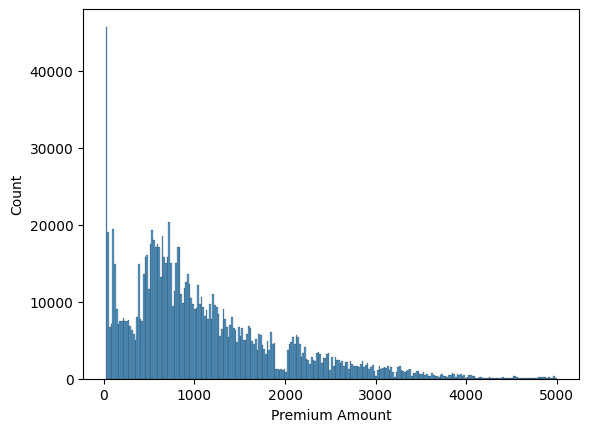

In [15]:
sns.histplot(data=df, x='Premium Amount')

## Policy date start

<Axes: xlabel='Policy Start Date,Policy Start Date'>

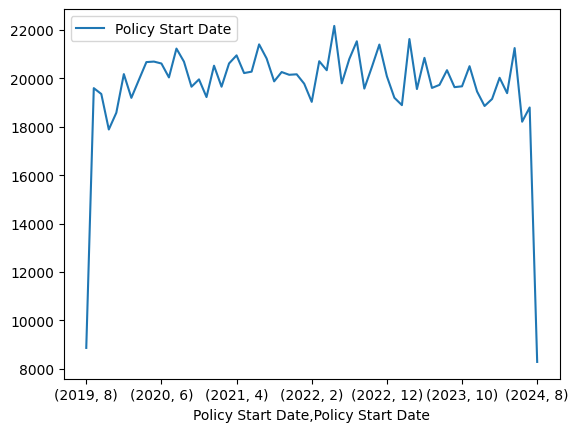

In [54]:
df['Policy Start Date']\
    .groupby([df['Policy Start Date'].dt.year, df['Policy Start Date'].dt.month])\
    .count()\
    .to_frame()\
    .plot()

In [62]:
len((df['Policy Start Date'].dt.year.astype(str) + "-" + df['Policy Start Date'].dt.month.astype(str)).unique())

61

Possibly add 61 more columns to the dataset

maybe change the dates to policy started days ago

In [69]:
import time
from datetime import datetime
df['Policy Start Date'] = df['Policy Start Date'].dt.strftime('%Y%m%d')
df['Policy Start Date'] = datetime.now() - df['Policy Start Date']

In [101]:
dates_column = (pd.Timestamp.now() - pd.to_datetime(df['Policy Start Date'].dt.strftime('%Y-%m-%d'), format='%Y-%m-%d')).dt.days

<Axes: >

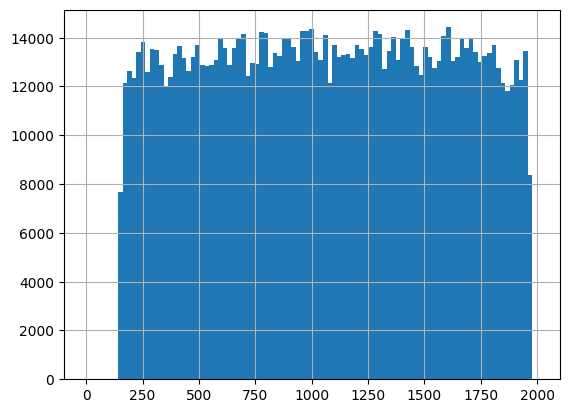

In [102]:
bins = np.linspace(0, 2000, 100)

#dates_column.hist(bins=bins)
dates_column.hist(bins=bins)

# Test Data

In [63]:
test_data = pd.read_csv('test.csv', parse_dates=['Policy Start Date'])

In [64]:
test_data.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House
5,1200005,43.0,Male,52370.0,Married,2.0,Bachelor's,NaN,5.386224,Suburban,Basic,NaN,15.0,432.0,2.0,2022-07-08 15:21:39.223901,NaN,No,Rarely,Condo
6,1200006,21.0,Female,5896.0,Married,3.0,Master's,NaN,14.773963,Rural,Comprehensive,1.0,14.0,321.0,8.0,2023-11-12 15:21:39.288099,Good,No,Monthly,Condo
7,1200007,44.0,Male,31855.0,Divorced,3.0,Bachelor's,NaN,20.847900,Suburban,Premium,NaN,8.0,712.0,1.0,2021-03-12 15:21:39.149731,Poor,Yes,Monthly,Apartment
8,1200008,32.0,Female,76463.0,Divorced,4.0,PhD,NaN,22.988787,Suburban,Basic,0.0,1.0,540.0,2.0,2021-07-08 15:21:39.169102,Average,No,Weekly,Apartment
9,1200009,48.0,Female,27982.0,Married,2.0,High School,NaN,43.567433,Urban,Premium,1.0,15.0,757.0,7.0,2021-02-15 15:21:39.134960,Good,Yes,Daily,House


array([[<Axes: title={'center': 'Policy Start Date'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

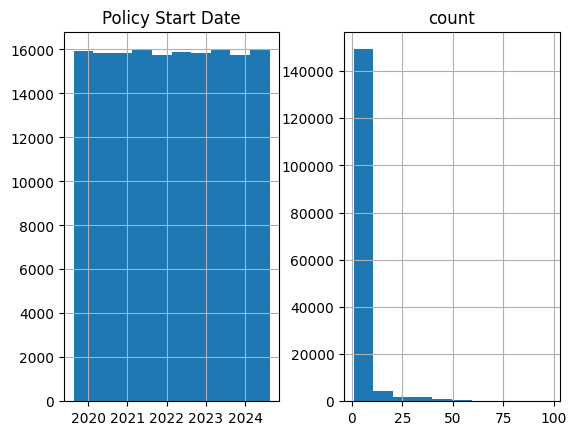

In [91]:
test_data['Policy Start Date'].value_counts().reset_index().hist()